In [12]:
import numpy as np
import matplotlib.pyplot as plt
import modules

#EXERCISE 2
#Second create a function to read the csv file containing
#Copenhagen city population data and return a numpy array 
#(numpy.ndarray). hint: use np.genfromtxt(filename, delimiter=',',
#dtype=np.uint, skip_header=1) as in the slides
#Create data
data = np.ndarray
data = np.genfromtxt('befkbhalderstatkode.csv', delimiter=',', dtype=np.uint, skip_header=1)

#Check the data is here
data.shape


(542517, 5)

In [2]:
#EXERCISE 3
#Third create a function that can extract the number of all the citizens from native english 
#speaking countries and from non english speaking countries. How many are there of each?
#(hint remember that with python you can return multiple values from a function).
modules.findEnglishSpeakingAndNonEnglishSpeaking(data)


{'eng_speaking': 9053.0, 'non_eng_speaking': 571242.0}

In [3]:
#EXERCISE 4
#FILTER FUNCTION
non_english_mask = (data[:,0] == 2015)
modules.filterFunc(data, non_english_mask)


array([[2015,    1,    0, 5100,  614],
       [2015,    1,    0, 5104,    2],
       [2015,    1,    0, 5106,    1],
       ...,
       [2015,   99,   82, 5100,    1],
       [2015,   99,   86, 5289,    1],
       [2015,   99,   90, 5289,    1]], dtype=uint64)

In [4]:
#EXERCISE 5
#FINDING XVALUES
modules.xValues(data, 0)

1087585500.0

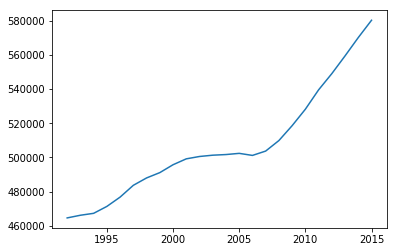

In [6]:
#EXERCISE 6
#Create Illustration 1: In your notebook use the above function and create a 2d array 
#of year as x and accumulated amount as y:
#create a line graph of the population change over time for all of Copenhagen

years = set(data[:,0])

amount_of_year_mask = (data[:,0])
amount = []

for v in list(years):
    amount_of_year_mask = (data[:,0]) == v
    people = modules.filterFunc(data, amount_of_year_mask)
    amount.append(sum(people[:,4]))
    
#2d array made, but never used below   
#print(np.array(amount+list(years)).reshape(len(years), 2))

x = tuple(years)
y = amount
plt.plot(x, y)

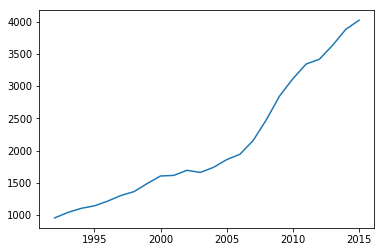

In [7]:
#Exercise7
#Create illustration 2: In your notebook use your module to create a dataset where development
#of all German citizens can be shown over time
#Germany = 5180

#mask to only get germans
german_mask = data[:, 3] == 5180
#slice of only germans
germans = data[german_mask]

#print(germans)

#test mask to find germans of given value
#age_per_year_mask = germans[:,0] == 1992
#print(sum(germans[age_per_year_mask][:,4]))

#find all the ages
years = set(germans[:,0])
#list to hold the amounts
amount = []
#loop through the diffrent ages and find their amount
for v in years:
    age_per_year_mask = germans[:,0] == v
    amount.append(sum(germans[age_per_year_mask][:,4]))

#results are in, time to make the graph!

x = tuple(years)
y = amount
plt.plot(x, y)

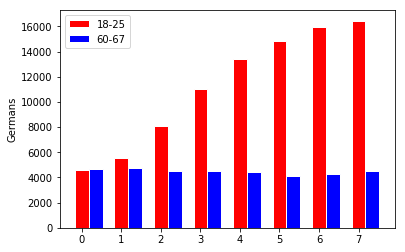

In [8]:
#EXERCISE 8
#Create illustration 3: Show a bar plot of all the 18-25 year old in the different areas
#of copenhagen and in the same plot show (in a different color) all 60-67 year old in the different areas.

people_18_to_25 = modules.get_data_by_age(data, 18, 25)

people_60_to_67 = modules.get_data_by_age(data, 60, 67)

width = 0.35       # the width of the bars: can also be len(x) sequence
r1 = np.arange(len(people_18_to_25.values()))
r2 = [x + width for x in r1]

p1 = plt.bar(r1, people_18_to_25.values(), label='18-25', color='red', width=width, edgecolor='white')
p2 = plt.bar(r2, people_60_to_67.values(), label='60-67', color='blue', width=width, edgecolor='white')

plt.ylabel('Germans')
plt.title('')

plt.legend((p1[0], p2[0]), ('18-25', '60-67'))

plt.show()

Text(0.5, 1.0, 'Age distribution in Vesterbro pie-chart')

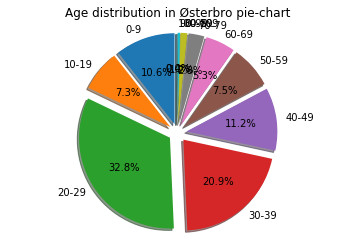

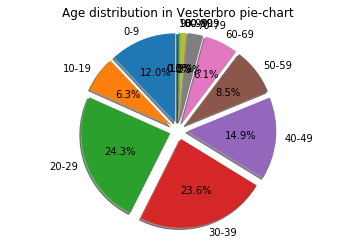

In [14]:
#EXERCISE 9
#Østerbro = area 3
#Vesterbro = area 4

#Create illustration 4: show a pie chart of age groups (0-10, 10-20, 20-30 ...) in Østerbro part of Copenhagen.
#create another similar piechart for Vesterbro.

osterbro = {'0-10':0, '10-20':0, '20-30':0,'30-40':0,'40-50':0,'50-60':0,'60-70':0,'70-80':0,'80-90':0,'90-100':0, '100-110':0}

#non_english_mask = (data[:,0] == 2015)


age_group = [[x * 10 + y for y in range(10)] for x in range(11)]
#for v in age_group:
    #print(v[0])
#np.in1d(data[:,3], english_countries)

osterbro = modules.findPeopleMask(data, age_group)
vesterbro = modules.findPeopleMask(data, age_group, 4)

explode = [0.1]*len(osterbro)

fig1, ax1 = plt.subplots()
ax1.pie(osterbro.values(), explode=tuple(explode), labels=osterbro.keys(), autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Age distribution in Østerbro pie-chart')

explode = [0.1]*len(vesterbro)

fig1, ax1 = plt.subplots()
ax1.pie(vesterbro.values(), explode=tuple(explode), labels=vesterbro.keys(), autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Age distribution in Vesterbro pie-chart')

#plt.show()